<a href="https://colab.research.google.com/github/wayaadhyasta/ProjectTim_LinearReggresion/blob/main/ProjectLinearReggresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/drive/MyDrive/dataproject.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


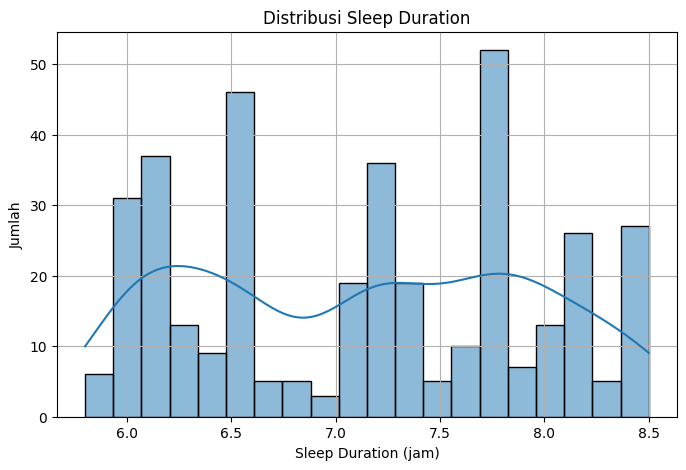

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sleep Duration'], kde=True, bins=20)
plt.title("Distribusi Sleep Duration")
plt.xlabel("Sleep Duration (jam)")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

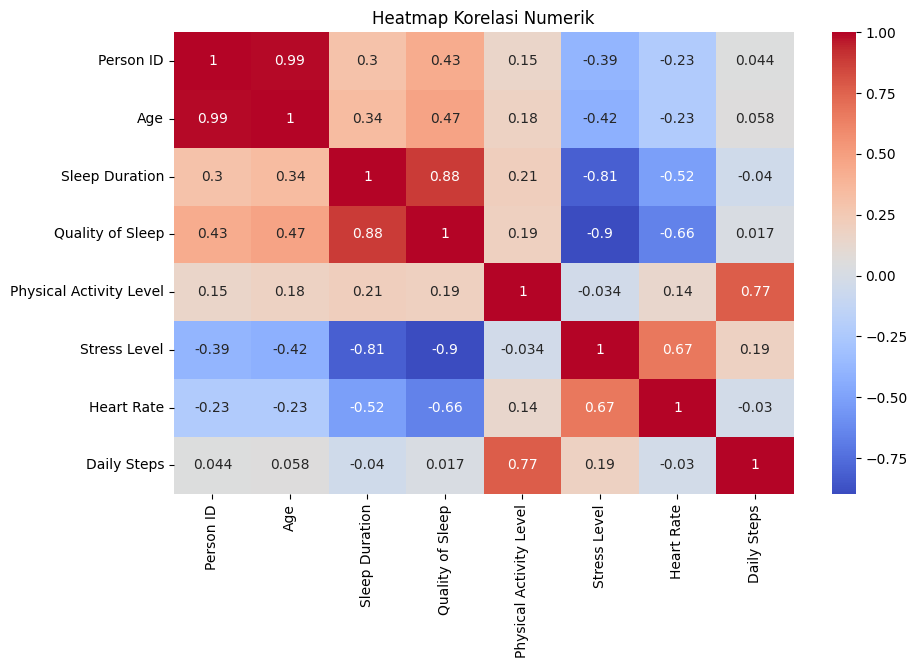

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Numerik")
plt.show()


<ipython-input-19-0b043a0c3434>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='BMI Category', y='Sleep Duration', ci=None)


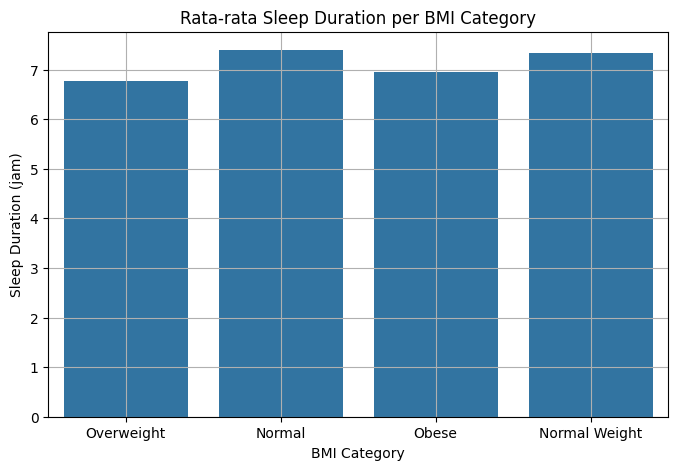

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='BMI Category', y='Sleep Duration', ci=None)
plt.title("Rata-rata Sleep Duration per BMI Category")
plt.ylabel("Sleep Duration (jam)")
plt.xlabel("BMI Category")
plt.grid(True)
plt.show()

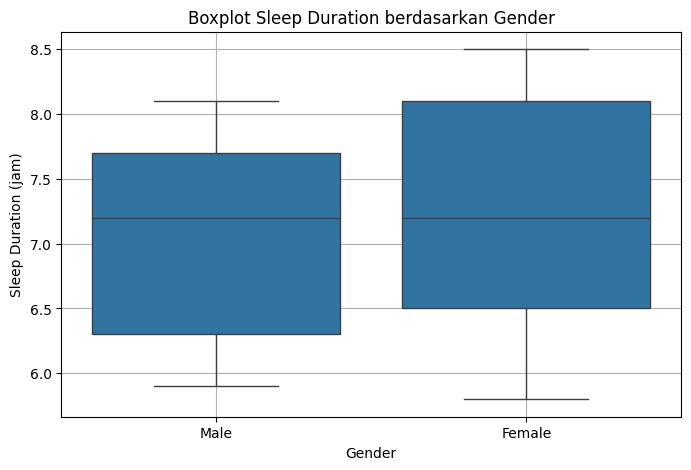

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Sleep Duration')
plt.title("Boxplot Sleep Duration berdasarkan Gender")
plt.ylabel("Sleep Duration (jam)")
plt.xlabel("Gender")
plt.grid(True)
plt.show()

In [22]:
df_model = df.drop(columns=['Person ID', 'Blood Pressure', 'Sleep Disorder'])
categorical_cols = ['Gender', 'Occupation', 'BMI Category']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le
df_model

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,3,77,4200
1,1,28,1,6.2,6,60,8,0,75,10000
2,1,28,1,6.2,6,60,8,0,75,10000
3,1,28,6,5.9,4,30,8,2,85,3000
4,1,28,6,5.9,4,30,8,2,85,3000
...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,68,7000
370,0,59,5,8.0,9,75,3,3,68,7000
371,0,59,5,8.1,9,75,3,3,68,7000
372,0,59,5,8.1,9,75,3,3,68,7000


In [23]:
X = df_model.drop(columns=['Sleep Duration'])
y = df_model['Sleep Duration']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Model Linear Regression:")
print(f"- Mean Squared Error (MSE): {mse:.3f}")
print(f"- R-squared (R²): {r2:.3f}")


Evaluasi Model Linear Regression:
- Mean Squared Error (MSE): 0.103
- R-squared (R²): 0.846


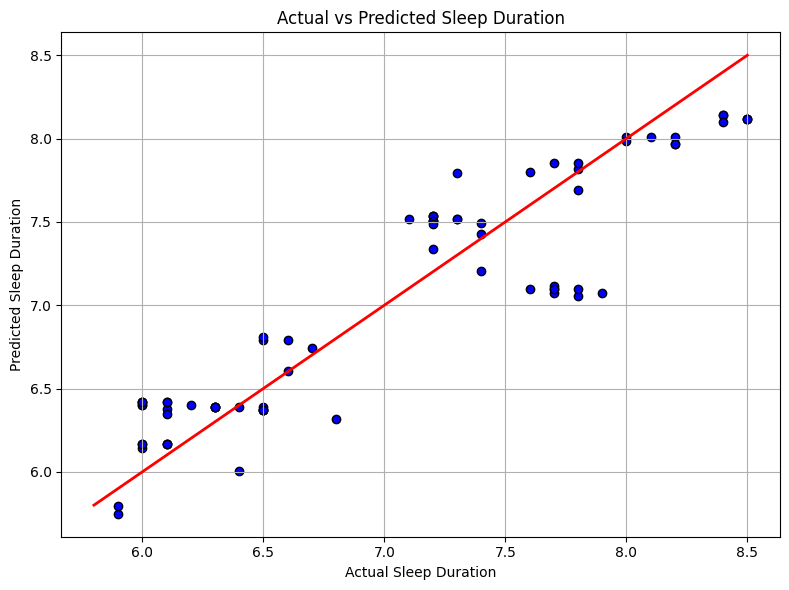

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel("Actual Sleep Duration")
plt.ylabel("Predicted Sleep Duration")
plt.title("Actual vs Predicted Sleep Duration")
plt.grid(True)
plt.tight_layout()
plt.show()